In [1]:
import numpy as np
import pandas as pd
import os
import re
from io import StringIO
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder_names = ['data_summaries', 'validation_data_summaries']
for folder_name in folder_names:
    try:
        os.mkdir(folder_name)
        print("Directory" , folder_name ,  "created ") 
    except FileExistsError:
        print("Directory" , folder_name ,  "already exists")
    if folder_name == 'data_summaries':
        data_folder_name = 'data'
    if folder_name == 'validation_data_summaries':
        data_folder_name = 'validation_data'
    for folder in os.listdir(data_folder_name):
        with open(os.path.join(folder_name, 'summary_{}.txt'.format(str(folder))), "w") as outfile:
            for textfile in os.listdir(os.path.join(data_folder_name, folder)):
                contents = open( os.path.join(data_folder_name, folder, textfile) ).read()
                outfile.write(contents)

Directory data_summaries already exists
Directory validation_data_summaries already exists


In [3]:
data_summaries = pd.read_excel('data.xlsx')
file_list = os.listdir('data_summaries')
validation_file_list = os.listdir('validation_data_summaries')

In [4]:
def listToString(s):  
    str1 = '' 
    for ele in s:  
        str1 += ele
    return str1

In [5]:
data_rows = []
for text_file in file_list:
    subject_num = int(re.sub("[^0-9]", "", text_file))
    with open (os.path.join('data_summaries', text_file), 'r') as text_file:
        string = text_file.readlines()
        for line in tqdm(string):
            line_string = listToString( line[:-1] + '\t{}'.format(subject_num) + '\n')
            if len([s for s in line_string if '\t' in s]) == 14:
                data_rows.append(line_string)

columns = ['C_{}'.format(x) for x in range(12)] + ['TYPE_ID', 'MEASUREMENT_NO', 'SUB_NO']
print('Making string...')
data_string = ''.join(data_rows)
print('Making string object...')
string_object = StringIO(data_string)
print('Making data frame...')
df = pd.read_csv(string_object, sep='\t', header=None, usecols=range(15))
df.columns = columns
where_numeric = df.applymap(np.isreal).all(1)
df = df[where_numeric]
print(df.shape)

100%|██████████| 95187/95187 [00:01<00:00, 78459.64it/s]
Making string...
Making string object...
Making data frame...
(989538, 15)


In [6]:
data_rows = []
for text_file in validation_file_list:
    subject_num = int(re.sub("[^0-9]", "", text_file))
    with open (os.path.join('validation_data_summaries', text_file), 'r') as text_file:
        string = text_file.readlines()
        for line in tqdm(string):
            line_string = listToString( line[:-1] + '\t{}'.format(subject_num) + '\n')
            if len([s for s in line_string if '\t' in s]) == 14:
                data_rows.append(line_string)

columns = ['C_{}'.format(x) for x in range(12)] + ['TYPE_ID', 'MEASUREMENT_NO', 'SUB_NO']
print('Making string...')
data_string = ''.join(data_rows)
print('Making string object...')
string_object = StringIO(data_string)
print('Making data frame...')
df_val = pd.read_csv(string_object, sep='\t', header=None, usecols=range(15))
df_val.columns = columns
where_numeric = df_val.applymap(np.isreal).all(1)
df_val = df_val[where_numeric]
print(df_val.shape)

100%|██████████| 115307/115307 [00:01<00:00, 78276.61it/s]
Making string...
Making string object...
Making data frame...
(1154267, 15)


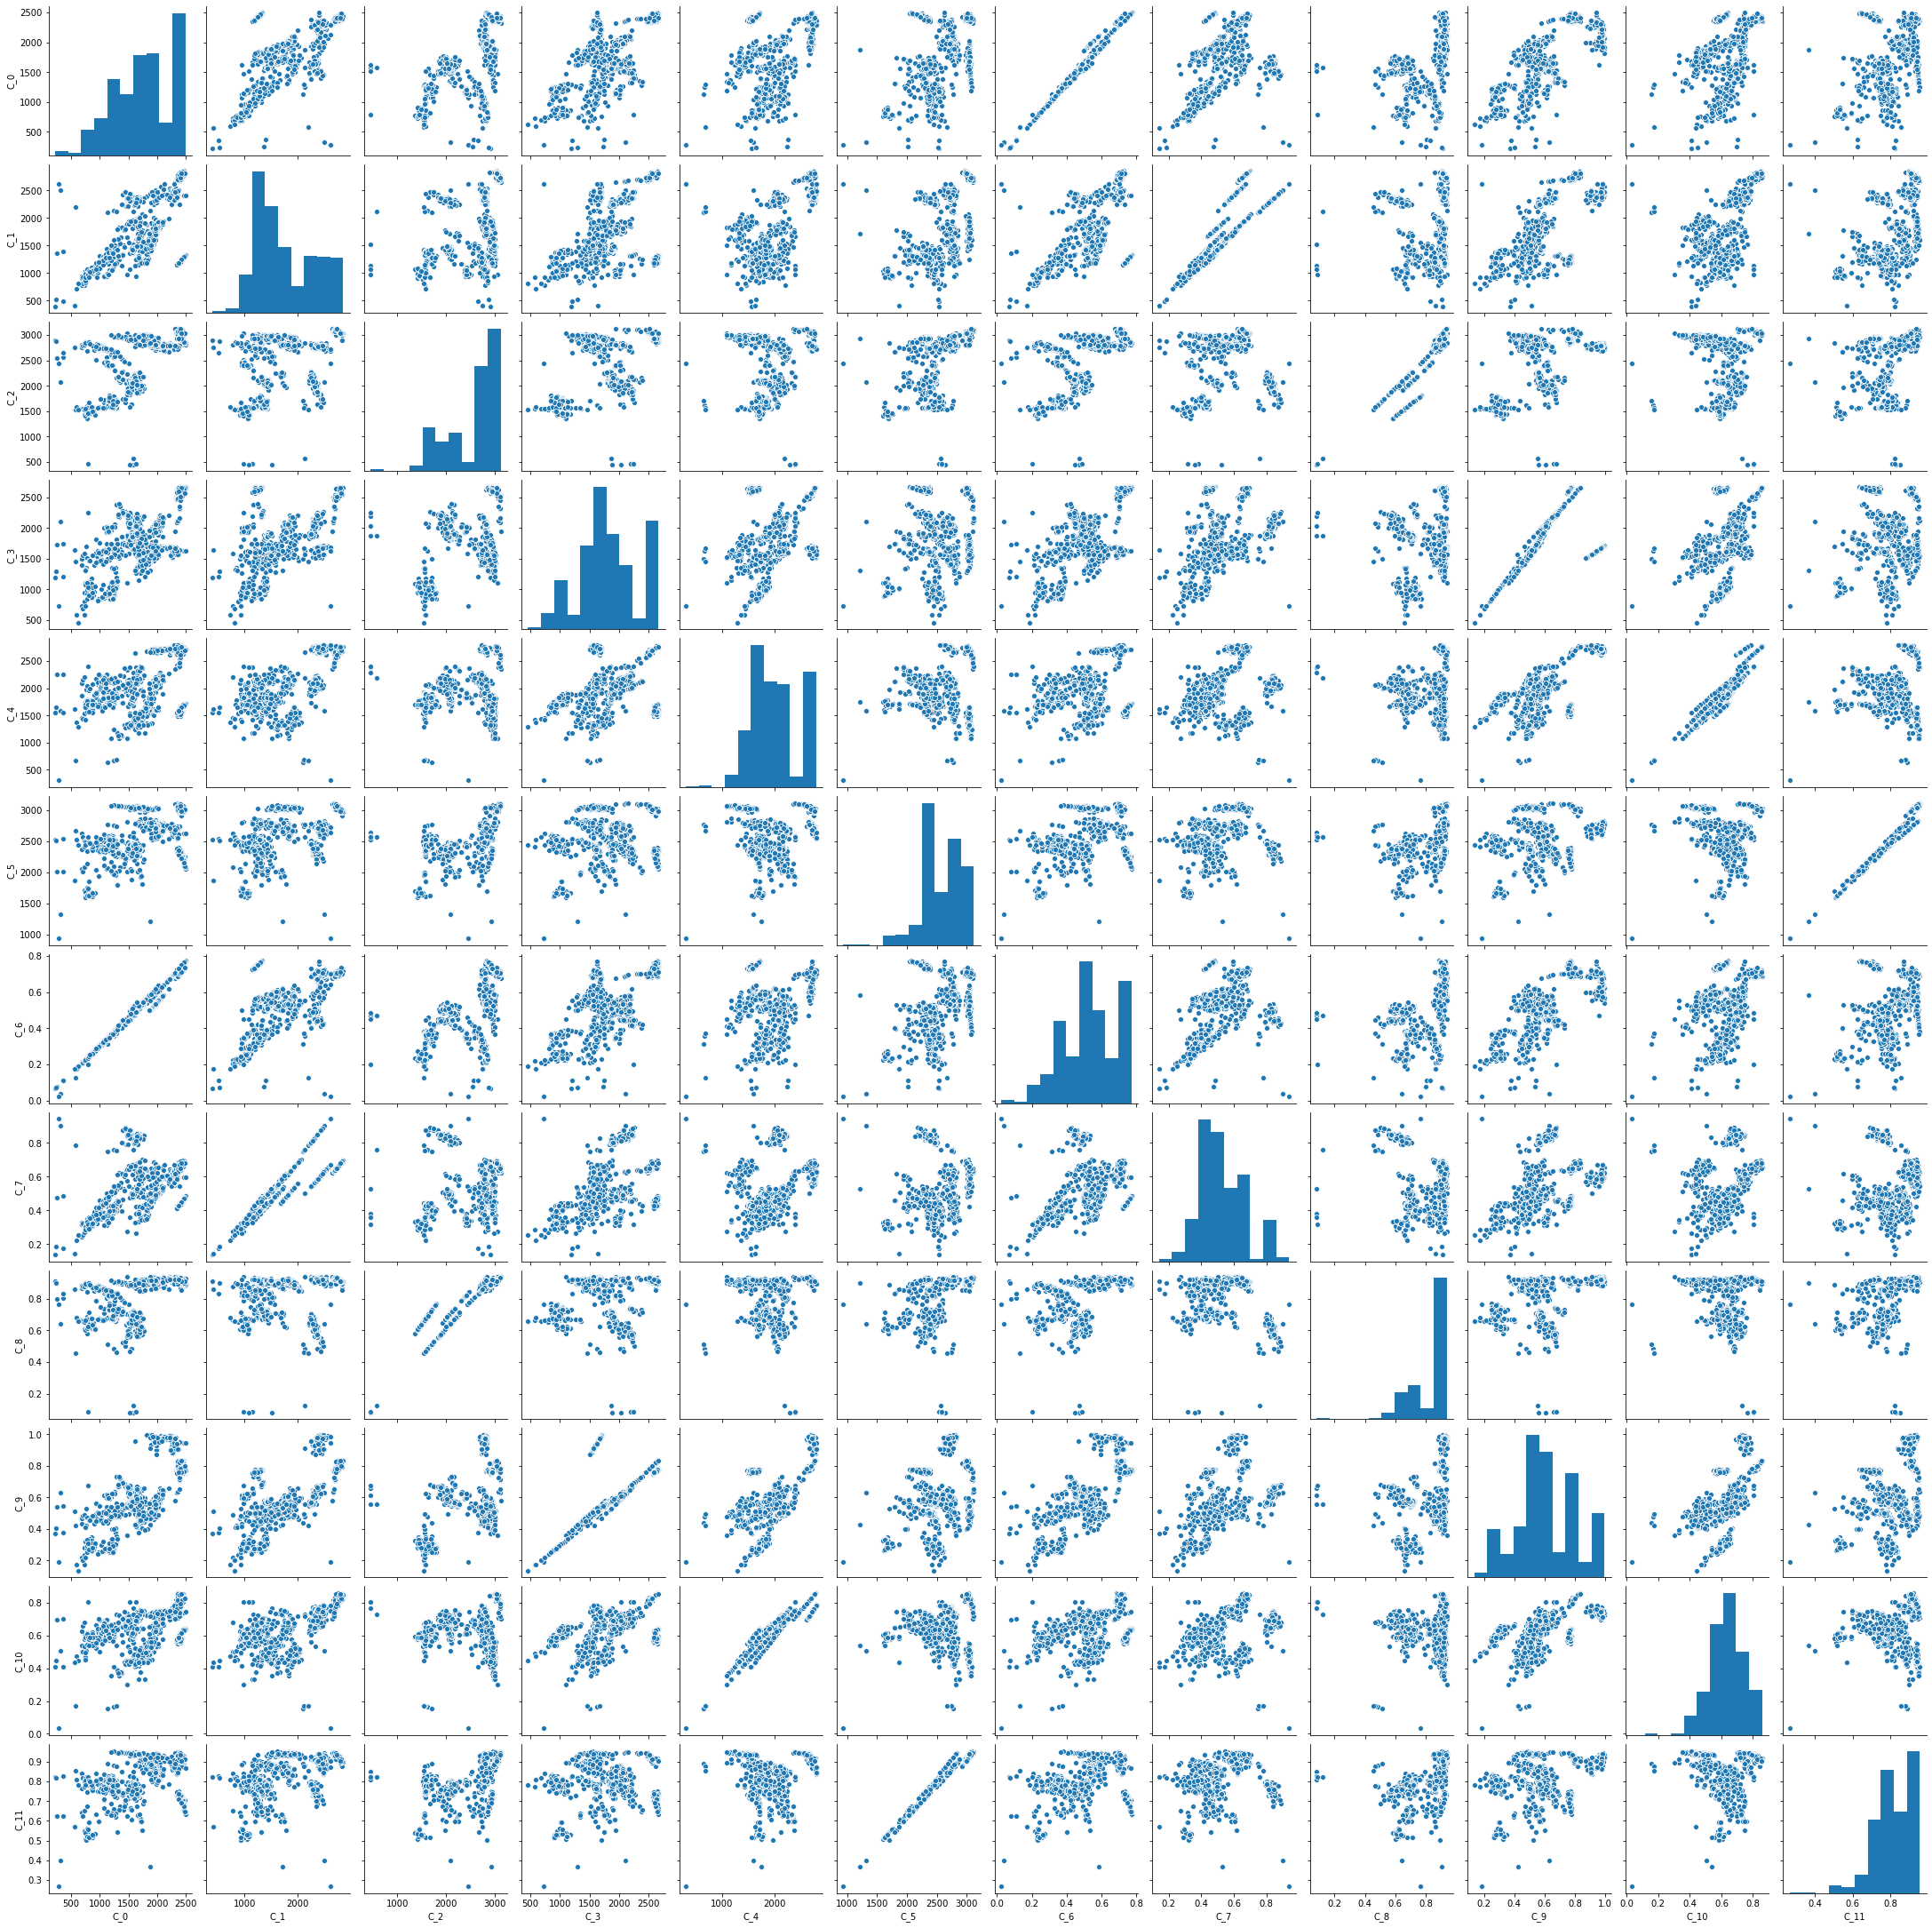

<Figure size 2160x2160 with 0 Axes>

In [7]:
from IPython.display import Image
sns_plot = sns.pairplot(df[df['TYPE_ID']==1].iloc[:, :12].sample(1000))
sns_plot.savefig("pairplot.png")

plt.clf()
Image(filename='pairplot.png')

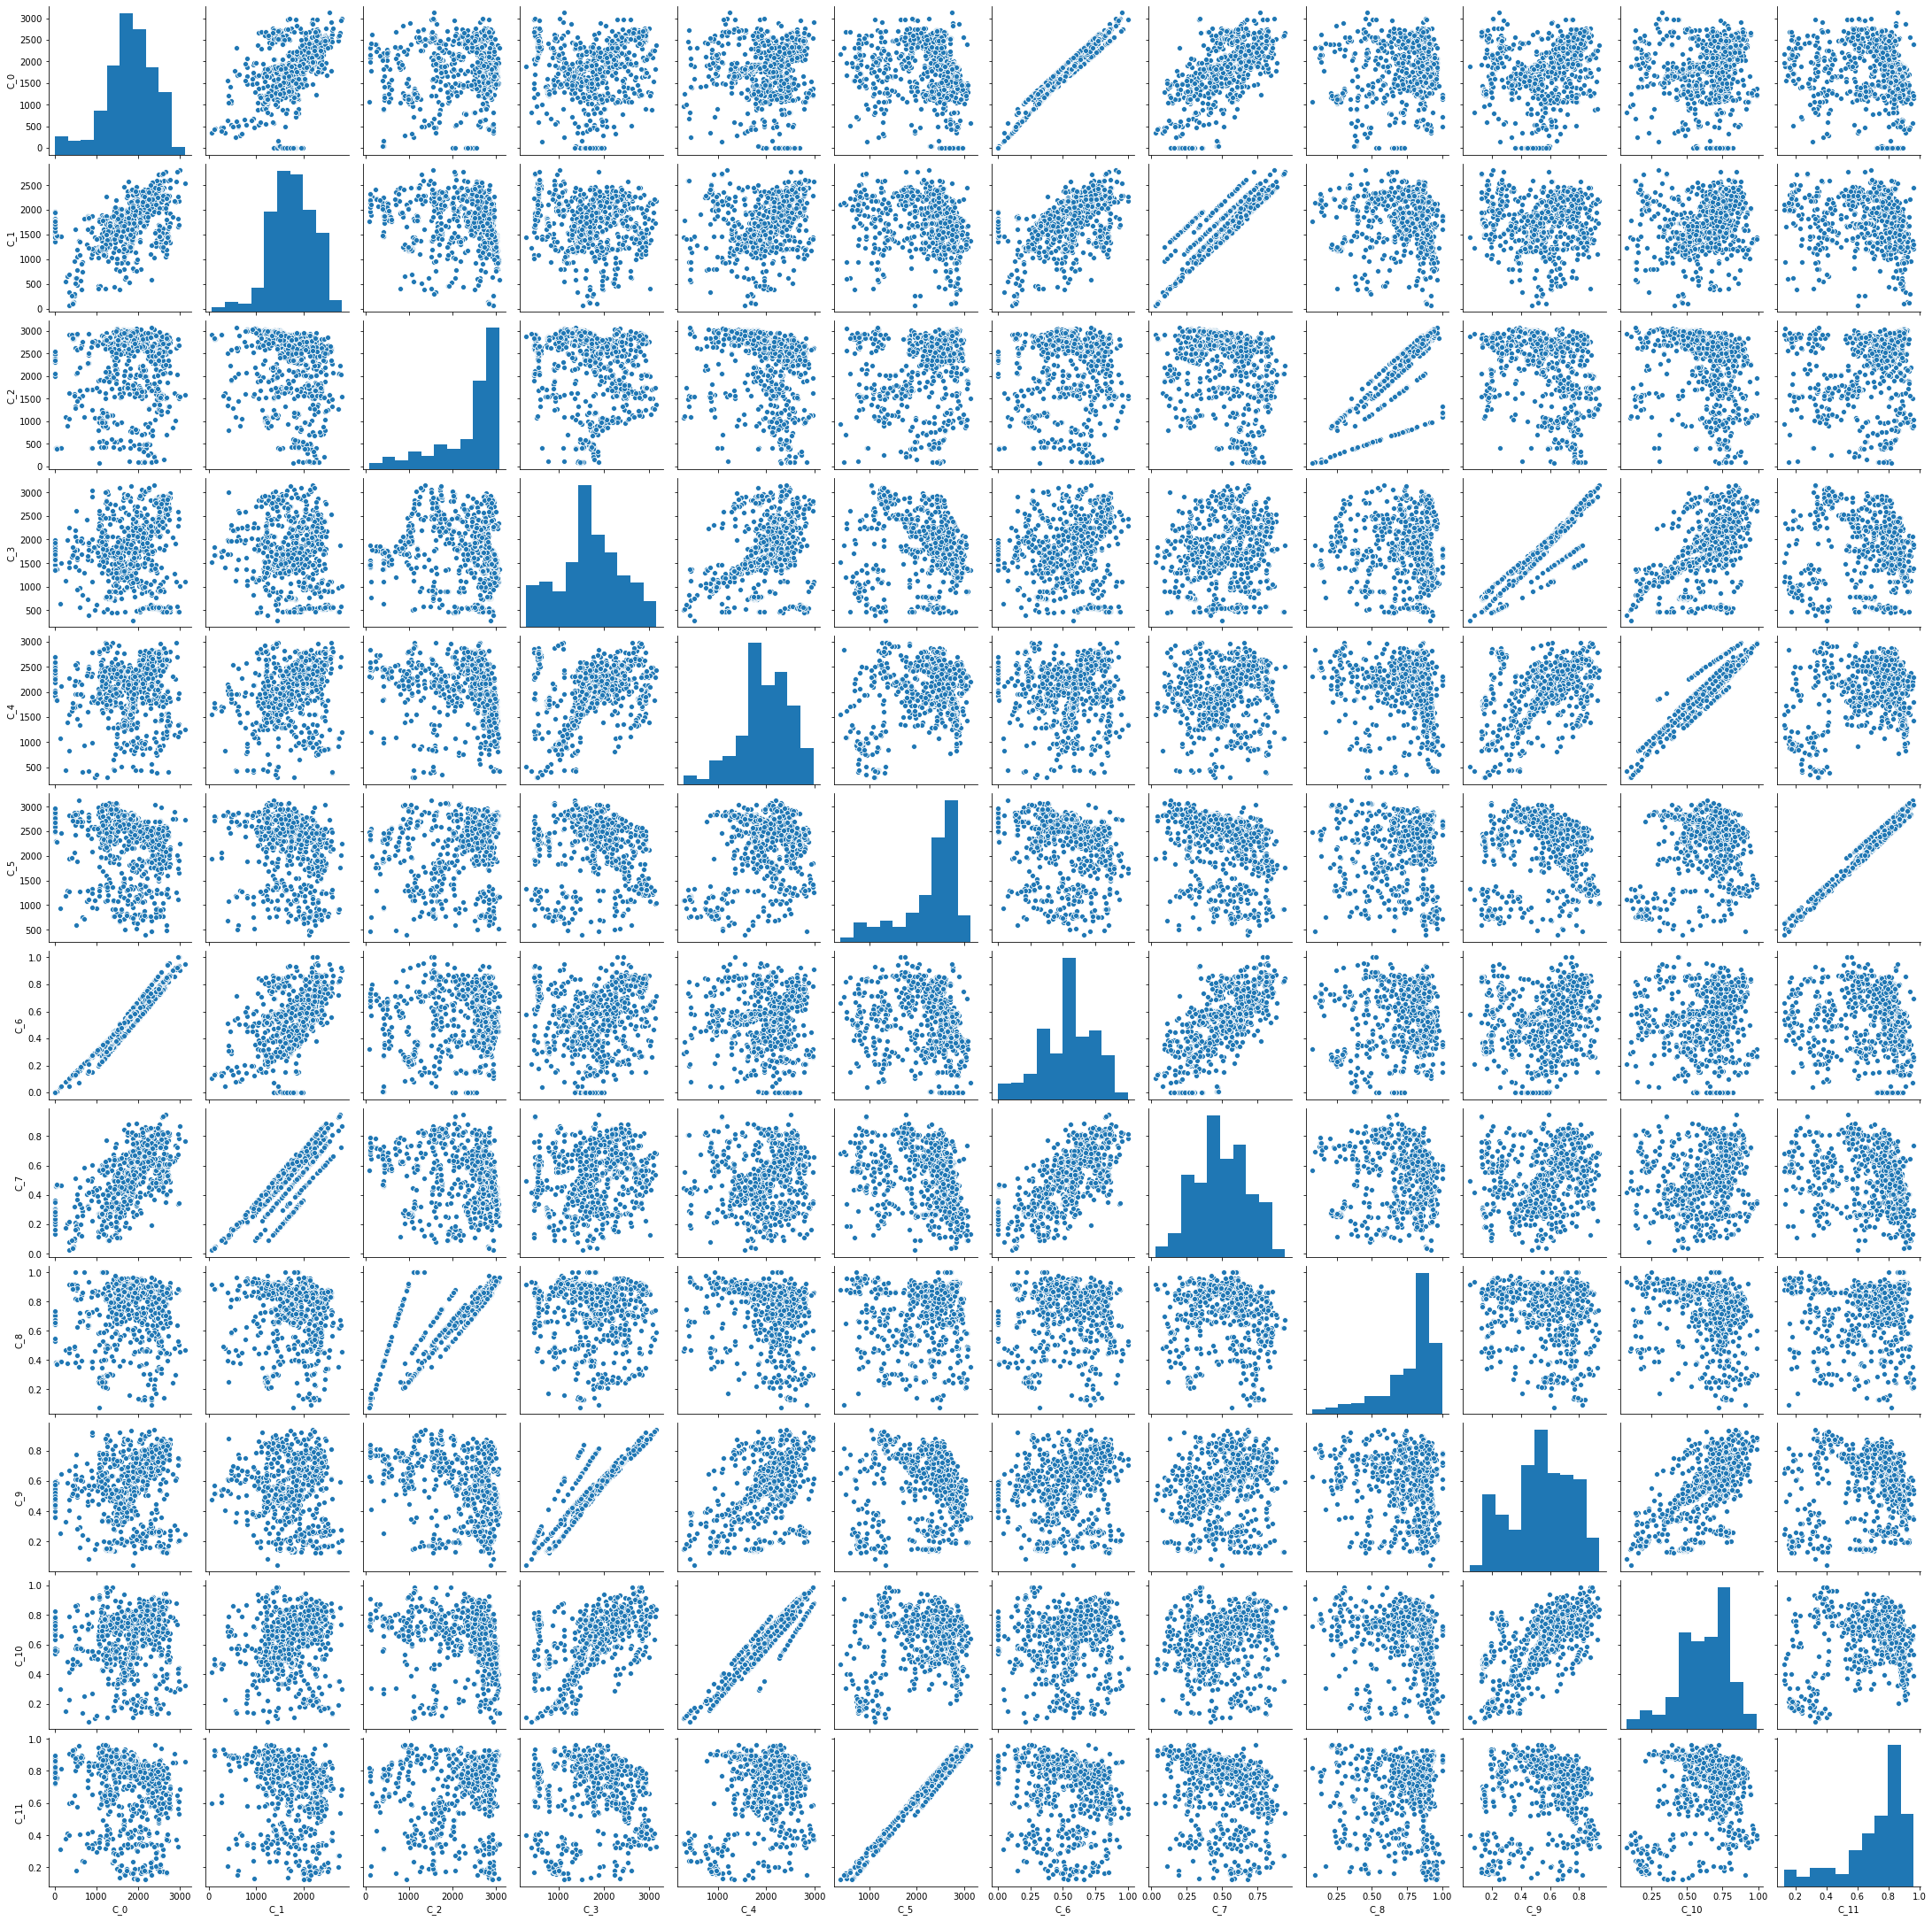

<Figure size 2160x2160 with 0 Axes>

In [8]:
sns_plot = sns.pairplot(df_val[df_val['TYPE_ID']==1].iloc[:, :12].sample(1000))
sns_plot.savefig("pairplot.png")

plt.clf()
Image(filename='pairplot.png')